In [22]:
import numpy as np
import pandas as pd
import math

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn with default theme, scaling, and color palette
sns.set()

In [2]:
advertising = pd.read_csv('datasets/Advertising.csv')

In [3]:
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [34]:
advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales,TV-var,TV-mean_diff,sales-mean_diff
count,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,100.500000,147.042500,23.264000,30.554000,14.022500,1.008971e-14,1.008971e-14,-8.526513e-16
std,57.879185,85.854236,14.846809,21.778621,5.217457,8.585424e+01,8.585424e+01,5.217457e+00
min,1.000000,0.700000,0.000000,0.300000,1.600000,-1.463425e+02,-1.463425e+02,-1.242250e+01
25%,50.750000,74.375000,9.975000,12.750000,10.375000,-7.266750e+01,-7.266750e+01,-3.647500e+00
50%,100.500000,149.750000,22.900000,25.750000,12.900000,2.707500e+00,2.707500e+00,-1.122500e+00
75%,150.250000,218.825000,36.525000,45.100000,17.400000,7.178250e+01,7.178250e+01,3.377500e+00
max,200.000000,296.400000,49.600000,114.000000,27.000000,1.493575e+02,1.493575e+02,1.297750e+01


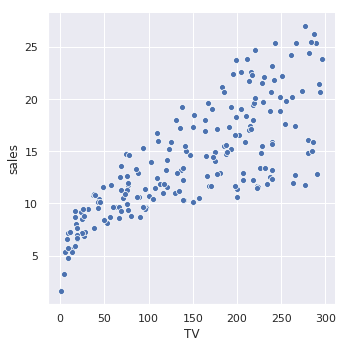

In [39]:
sns.relplot(x='TV', y='sales', data=advertising)

Let $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$ be the prediction of $Y$ on the ith value of $X$.

Based on the least square approach:

$\hat{\beta_1} = \frac{\displaystyle\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})} {\displaystyle\sum_{i=1}^{n} (x_i - \bar{x})^2}$

and

$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$

If we're trying to regress `sales` onto `TV`, then $\bar{x} = \bar{TV}$ and $\bar{y} = \bar{sales}$

In [7]:
x_bar = advertising.TV.mean()
y_bar = advertising.sales.mean()

print(x_bar)
print(y_bar)

147.0425
14.0225


In [13]:
advertising['TV-mean_diff'] = advertising.TV - x_bar
advertising['sales-mean_diff'] = advertising.sales - y_bar

In [14]:
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales,TV-var,TV-mean_diff,sales-mean_diff
0,1,230.1,37.8,69.2,22.1,83.0575,83.0575,8.0775
1,2,44.5,39.3,45.1,10.4,-102.5425,-102.5425,-3.6225
2,3,17.2,45.9,69.3,9.3,-129.8425,-129.8425,-4.7225
3,4,151.5,41.3,58.5,18.5,4.4575,4.4575,4.4775
4,5,180.8,10.8,58.4,12.9,33.7575,33.7575,-1.1225


In [32]:
beta1 = np.sum(advertising['TV-mean_diff'] * advertising['sales-mean_diff']) / (np.sum(np.square(advertising['TV-mean_diff'])))
beta1

0.047536640433019736

In [33]:
beta0 = y_bar - (beta1 * x_bar)
beta0

7.0325935491276965

In [38]:
# Get some points to plot with
zero_y = beta0 + beta1 * 0
max_y = beta0 + beta1 * advertising.TV.max()

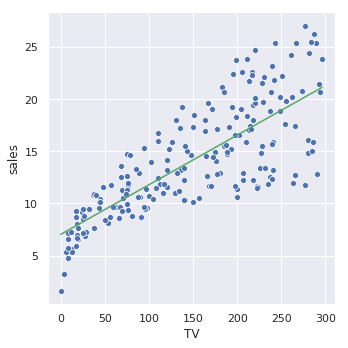

In [42]:
sns.relplot(x='TV', y='sales', data=advertising)
plt.plot([0, advertising.TV.max()], [zero_y, max_y], 'g-')
plt.show()

Not bad for a little math.